# Movie Analysis

## Written by Mojeed Ajegbile

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Question 1
The needed libraries were imported, and the movies.csv file was read. The 'genres' column strings were splitted and the length of the list that is in each record obtained. Zero is stored for records with no genre listed. The lengths are stored in a series. The series is passed into seaborn countplot method and it displays movie classification by genre and the count.

Text(0.5,1,'Movie Classification by Genre')

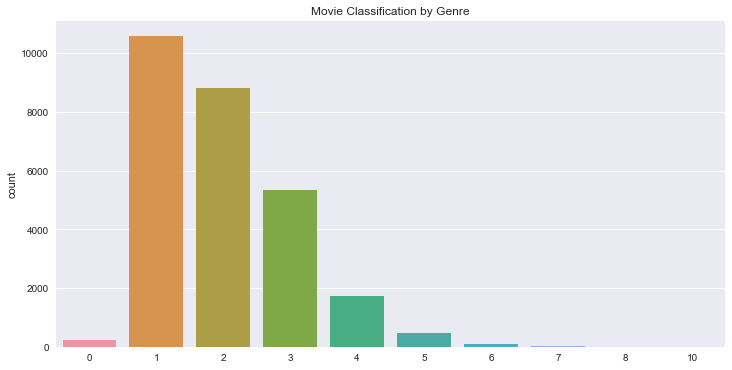

In [10]:
dataM=pd.read_csv("movies.csv")
List=pd.Series([len(genres.split("|"))if genres!='(no genres listed)' else 0 for genres in dataM.genres])
f=plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
ax = sns.countplot(x=List)
ax.set_title('Movie Classification by Genre')


### Question 2
All the genre of movies that are classified into one genre or more is obtained by splitting the string in each record and saving all of them into a series. Their counts are sorted in ascending order, the series itself passed into seaborn's countplot which is ordered in ascending order using the count of each genre.

Text(0.5,1,'Movie Popularity by Genres')

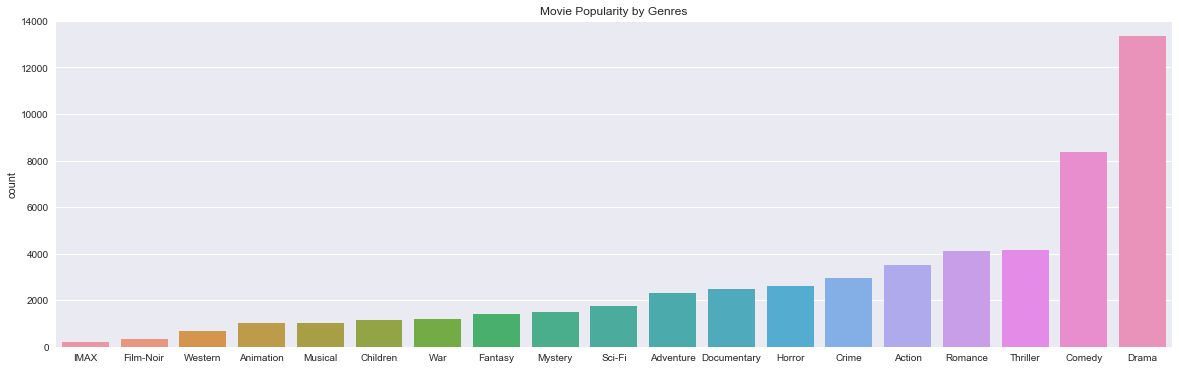

In [11]:
popular=pd.Series([g for genres in dataM.genres for g in genres.split("|") if genres!='(no genres listed)'])
pop=popular.value_counts().sort_values(ascending=True)
f=plt.figure(figsize=(20,6))
sns.set(style="darkgrid")
ax = sns.countplot(x=popular,order=[p for p in pop.index])
ax.set_title('Movie Popularity by Genres')


### Question 3
After reading the tag.csv file, all tags were converted to lowercase and the count of unique tags were obtained. The top ten tags were obtained by cutting the top ten count from the series that contains the count of the the tags. The top ten tags were collected inside another series and were ploted in ascending order.

Text(0.5,1,'Most Popular Tags')

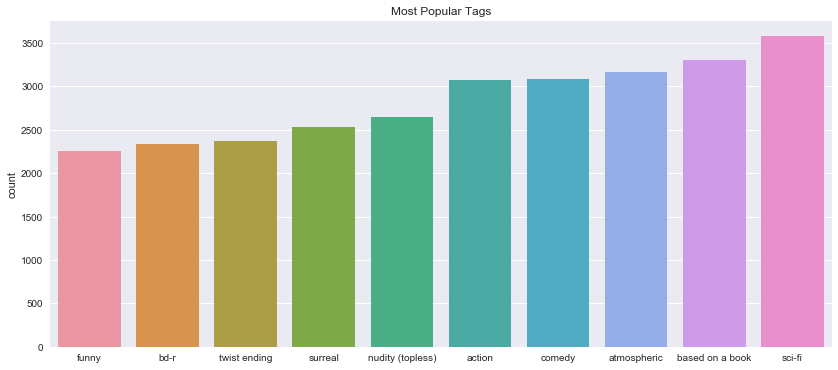

In [12]:
dataT=pd.read_csv("tags.csv")
tags=dataT.tag.str.lower()
tagCount=tags.value_counts()
topten=tagCount[:10]
toptenmode=topten.index.tolist()[::-1]
toptenList=pd.Series([tag for tag in tags if tag in toptenmode])
f=plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
ax = sns.countplot(x=toptenList,order=toptenmode)
ax.set_title('Most Popular Tags')

### Question 4
From the rating file the year corresponding to each rating is stored in the timestamp column, this years are obtained using methods from the datetime module. The years and their counts are plotted as a time series plot with matplotlib in descending order.


In [14]:
from datetime import datetime
dataR=pd.read_csv("ratings.csv")
years=pd.Series([datetime.fromtimestamp(int(t)).strftime('%Y') for t in dataR.timestamp]).value_counts().sort_index()
uniqueyr=[year for year in years.index]
countsyrs=[ct for ct in years.values]




Text(0.5,0.98,'Movie Ratings per Year')

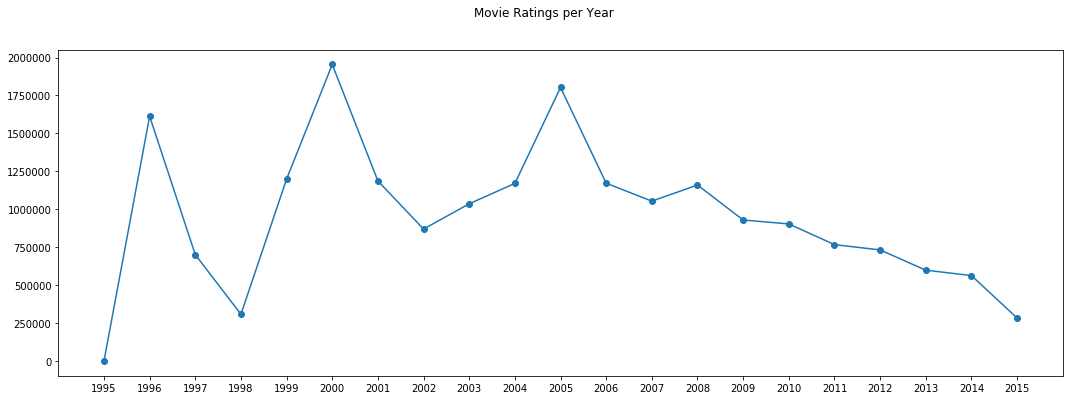

In [24]:
f=plt.figure(figsize=(18,6))
plt.plot(uniqueyr,countsyrs, 'o-')
plt.xlabel=('year')
plt.ylabel=('count')
f.suptitle('Movie Ratings per Year')

### Question 5
From the rating column, the mean of the ratings is calculated, unque ratings are sorted. Numpy "where" method is used to select a color scheme for the unique ratings based on whether they are greater than or less than the mean rating. The countplot displays count of ratings less than the mean as red and those greater than the mean as blue. 

Text(0.5,1,'Movie Rating Distribution')

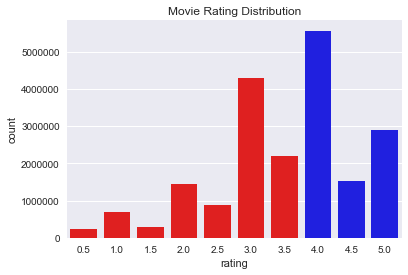

In [15]:
ratings=dataR.rating
rating_ave=dataR.rating.mean()
uniqueRatings = pd.Series(sorted(set(ratings)))
my_color = np.where(uniqueRatings>=rating_ave, 'blue', 'red')
sns.set(style="darkgrid")
ax=sns.countplot(x=ratings, palette=my_color)
ax.set_title('Movie Rating Distribution')







### Question 6
A function that takes a moveId and select all ratings of that movie from the rating file using the index of the movie in the movieid column to pick the corresponding moving rating from the rating column helps to perform this operation 4 times for different movies. The rating for these different movies are plotted using seaborn's countplot.

Text(0.5,1,'Tom and Huck (1995)')

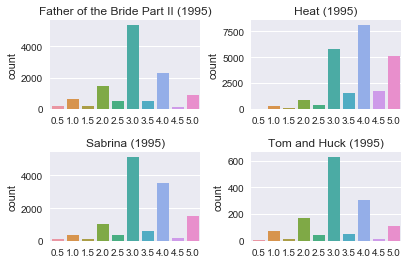

In [16]:
def getRatings(movId):
    ratLis=[movieratings[i] for i,j in enumerate(movieIdinratings) if j== movId]
    return ratLis
movieIds=dataM.movieId[4:8].tolist()
movieName=dataM.title[4:8].tolist()
movieratings=list(dataR.rating)
movieIdinratings=list(dataR.movieId)
l1=getRatings(movieIds[0])
l2=getRatings(movieIds[1])
l3=getRatings(movieIds[2])
l4=getRatings(movieIds[3])
fig, axes = plt.subplots(nrows=2, ncols=2)
sns.set(style="darkgrid")
plt.tight_layout(pad=2.0,w_pad=1.5,h_pad=2.0)
ax=sns.countplot(x=l1,ax=axes[0,0])
ax.set_title(movieName[0])
ax=sns.countplot(x=l2,ax=axes[0,1])
ax.set_title(movieName[1])
ax=sns.countplot(x=l3,ax=axes[1,0])
ax.set_title(movieName[2])
ax=sns.countplot(x=l4,ax=axes[1,1])
ax.set_title(movieName[3])
